## Trying warehouse layout


In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib import colors
import math
import numpy as np

In [2]:
min_x,min_y = 0,0
max_x, max_y = 320,240#640, 480
range_y = range(math.floor(min_y) - 50, math.ceil(max_y)+1, math.ceil((max_y - min_y) / 10))
range_x = range(math.floor(min_x) - 50, math.ceil(max_x)+1, math.ceil((max_y - min_y) / 10))


In [3]:
import random
r = lambda: random.randint(0,255)
print('#%02X%02X%02X' % (r(),r(),r()))

def random_hex_color():
    return '#%02X%02X%02X' % (r(),r(),r())


#27F718


In [4]:
def generate_rectangle_layout(s_l, s_w, a_l, a_w, area_b_l, direction):
    shelf_details = []
    
    #y_positions = gen_y_pos()
    shelf_x,shelf_y = s_l, s_w
    if direction == "v":
        shelf_x,shelf_y = s_w, s_l
    
    print(f"shelf_x, shelf_y {shelf_x},{shelf_y}")
    
    start_x, start_y = math.floor(s_l/2) + area_b_l[0], math.floor(shelf_y/2) + area_b_l[1]
    end_x, end_y = a_l + area_b_l[0], a_w  + area_b_l[1]
    
    for x in range(start_x,end_x, shelf_x):
        isPaired = False
        y = start_y
        while(y < (end_y)):
            cur_interval = shelf_y
            if (isPaired):
                cur_interval *= 2
                isPaired = False
            else:
                isPaired = True
            #print(f"cur_interval: {cur_interval}")
            
            y += cur_interval
            #print(f"y: {y}")
            shelf_details.append({
                "dir":direction,
                "loc":(x,y),
                "s_l":shelf_x,
                "s_w":shelf_y
            })
        
    return shelf_details

In [5]:
def print_warehouse_layout(s_l, s_w, a_l, a_w, shelf_details):
    range_y = range(0 - s_l, math.ceil(a_w + s_l + (a_l / 8)), math.ceil((a_w) / 5))
    range_x = range(0 - s_l, math.ceil(a_l + s_l+ (a_l / 8)), math.ceil((a_l) / 5))
    print(range_x)
    print(range_y)
    fig, ax = plt.subplots(figsize=(12,6))
    
    plt.yticks(range_y)
    plt.xticks(range_x)

    for shelf in shelf_details:
        b_l = (0,0)
        cur_x = shelf["s_l"]
        cur_y = shelf["s_w"]

        if shelf["dir"] == "h":
            cur_loc = shelf["loc"]
            b_l = (cur_loc[0] - s_l/2, cur_loc[1] - s_w/2)
        else:
            cur_loc = shelf["loc"]
            b_l = (cur_loc[0] - s_w/2, cur_loc[1] - s_l/2)

        #print(b_l)
        rect = patches.Rectangle(b_l, cur_x, cur_y, linewidth=1, edgecolor=random_hex_color(), facecolor='none')
        ax.add_patch(rect)


    # Add the patch to the Axes
    ax.add_patch(rect)
    plt.text(200, 380, "MIAO", fontsize=12, rotation='vertical')
    plt.show()

In [6]:
shelf_length = 75
shelf_width = 50
area_x_len = 560
area_x_width = 400
area_b_l = (480,540)
a_1 = generate_rectangle_layout(shelf_length, shelf_width, area_x_len, area_x_width,area_b_l,"h")

shelf_x, shelf_y 75,50


In [7]:
shelf_length = 100
shelf_width = 20
area_x_len = 560
area_x_width = 400
area_b_l = (0,0)
a_2 = generate_rectangle_layout(shelf_length, shelf_width, area_x_len, area_x_width,area_b_l,"v")

shelf_x, shelf_y 20,100


In [8]:
warehouse_len = 1200
warehouse_width = 1200

In [9]:
a_all = a_1 + a_2

In [10]:
print(len(a_1))
print(len(a_2))
print(len(a_all))

42
78
120


range(-100, 1450, 240)
range(-100, 1450, 240)


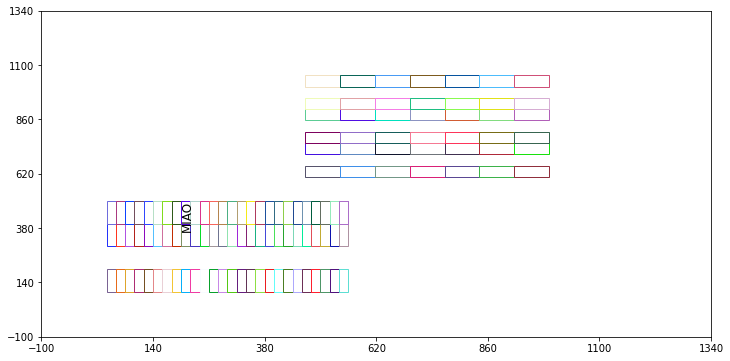

In [11]:
print_warehouse_layout(shelf_length, shelf_width, warehouse_len, warehouse_width, a_all)

In [12]:
def gen_occupancy_grid(layout,w_x, w_y):
    o_g = np.zeros((w_x, w_y))
    for item in layout:
        b_l = (0,0)
        size_x = item["s_l"]
        size_y = item["s_w"]
        if item["dir"] == "h":
            cur_loc = item["loc"]
            b_l = (cur_loc[0] - size_x/2, cur_loc[1] - size_y/2)
        else:
            cur_loc = item["loc"]
            b_l = (cur_loc[0] - size_y/2, cur_loc[1] - size_x/2)
        
        
        for x in range(math.floor(b_l[0]), math.ceil(size_x + b_l[0])):
            for y in range(math.floor(b_l[1]), math.ceil(size_y + b_l[1])):
                o_g[y][x] = 1
    return o_g

In [13]:
o_g = gen_occupancy_grid(a_all,warehouse_len, warehouse_width)

In [14]:
EMPTY_CELL = 0
OBSTACLE_CELL = 1
START_CELL = 2
GOAL_CELL = 3
MOVE_CELL = 4
def plot_grid(data, saveImageName):
    # create discrete colormap
    cmap = colors.ListedColormap(['white', 'black', 'green', 'red', 'blue'])
    bounds = [EMPTY_CELL, OBSTACLE_CELL, START_CELL, GOAL_CELL, MOVE_CELL ,MOVE_CELL + 1]
    norm = colors.BoundaryNorm(bounds, cmap.N)
    fig, ax = plt.subplots()
    ax.imshow(data, cmap=cmap, norm=norm)
    # draw gridlines
    ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=1)

    ax.set_xticks(np.arange(0.5, rows, 1));
    ax.set_yticks(np.arange(0.5, cols, 1));
    plt.tick_params(axis='both', which='both', bottom=False,   
                    left=False, labelbottom=False, labelleft=False) 
    fig.set_size_inches((8.5, 11), forward=False)
    plt.savefig(saveImageName + ".png", dpi=500)

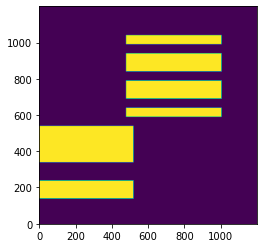

In [15]:
plt.imshow(o_g, origin='lower')